<a href="https://colab.research.google.com/github/iqbaleko/Visualizing-3D-terrain-with-cloud-data/blob/main/Visualizing_3D_terrain_with_cloud_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install earthengine-api

In [ ]:
import ee
ee.Authenticate()
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=V6QuAaO4-kkewMMWp0I8RjsrJhIOzeC5rGgRf_1WdFM&tc=Nima_c5IIe1uV-61c2wgWtZzx4TbTyFmBzJBBqrEsBA&cc=klgpCUF8gznFY4Z2D5moOYxk893VdbPoe4ztQ7dNT2E

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1Adeu5BXiOhIi0vOWukhECYjngN3KrBvUkVm-akU2qYGQQ7wCsI9v_CmPays

Successfully saved authorization token.


authorize Earth Engine Dataset procedure

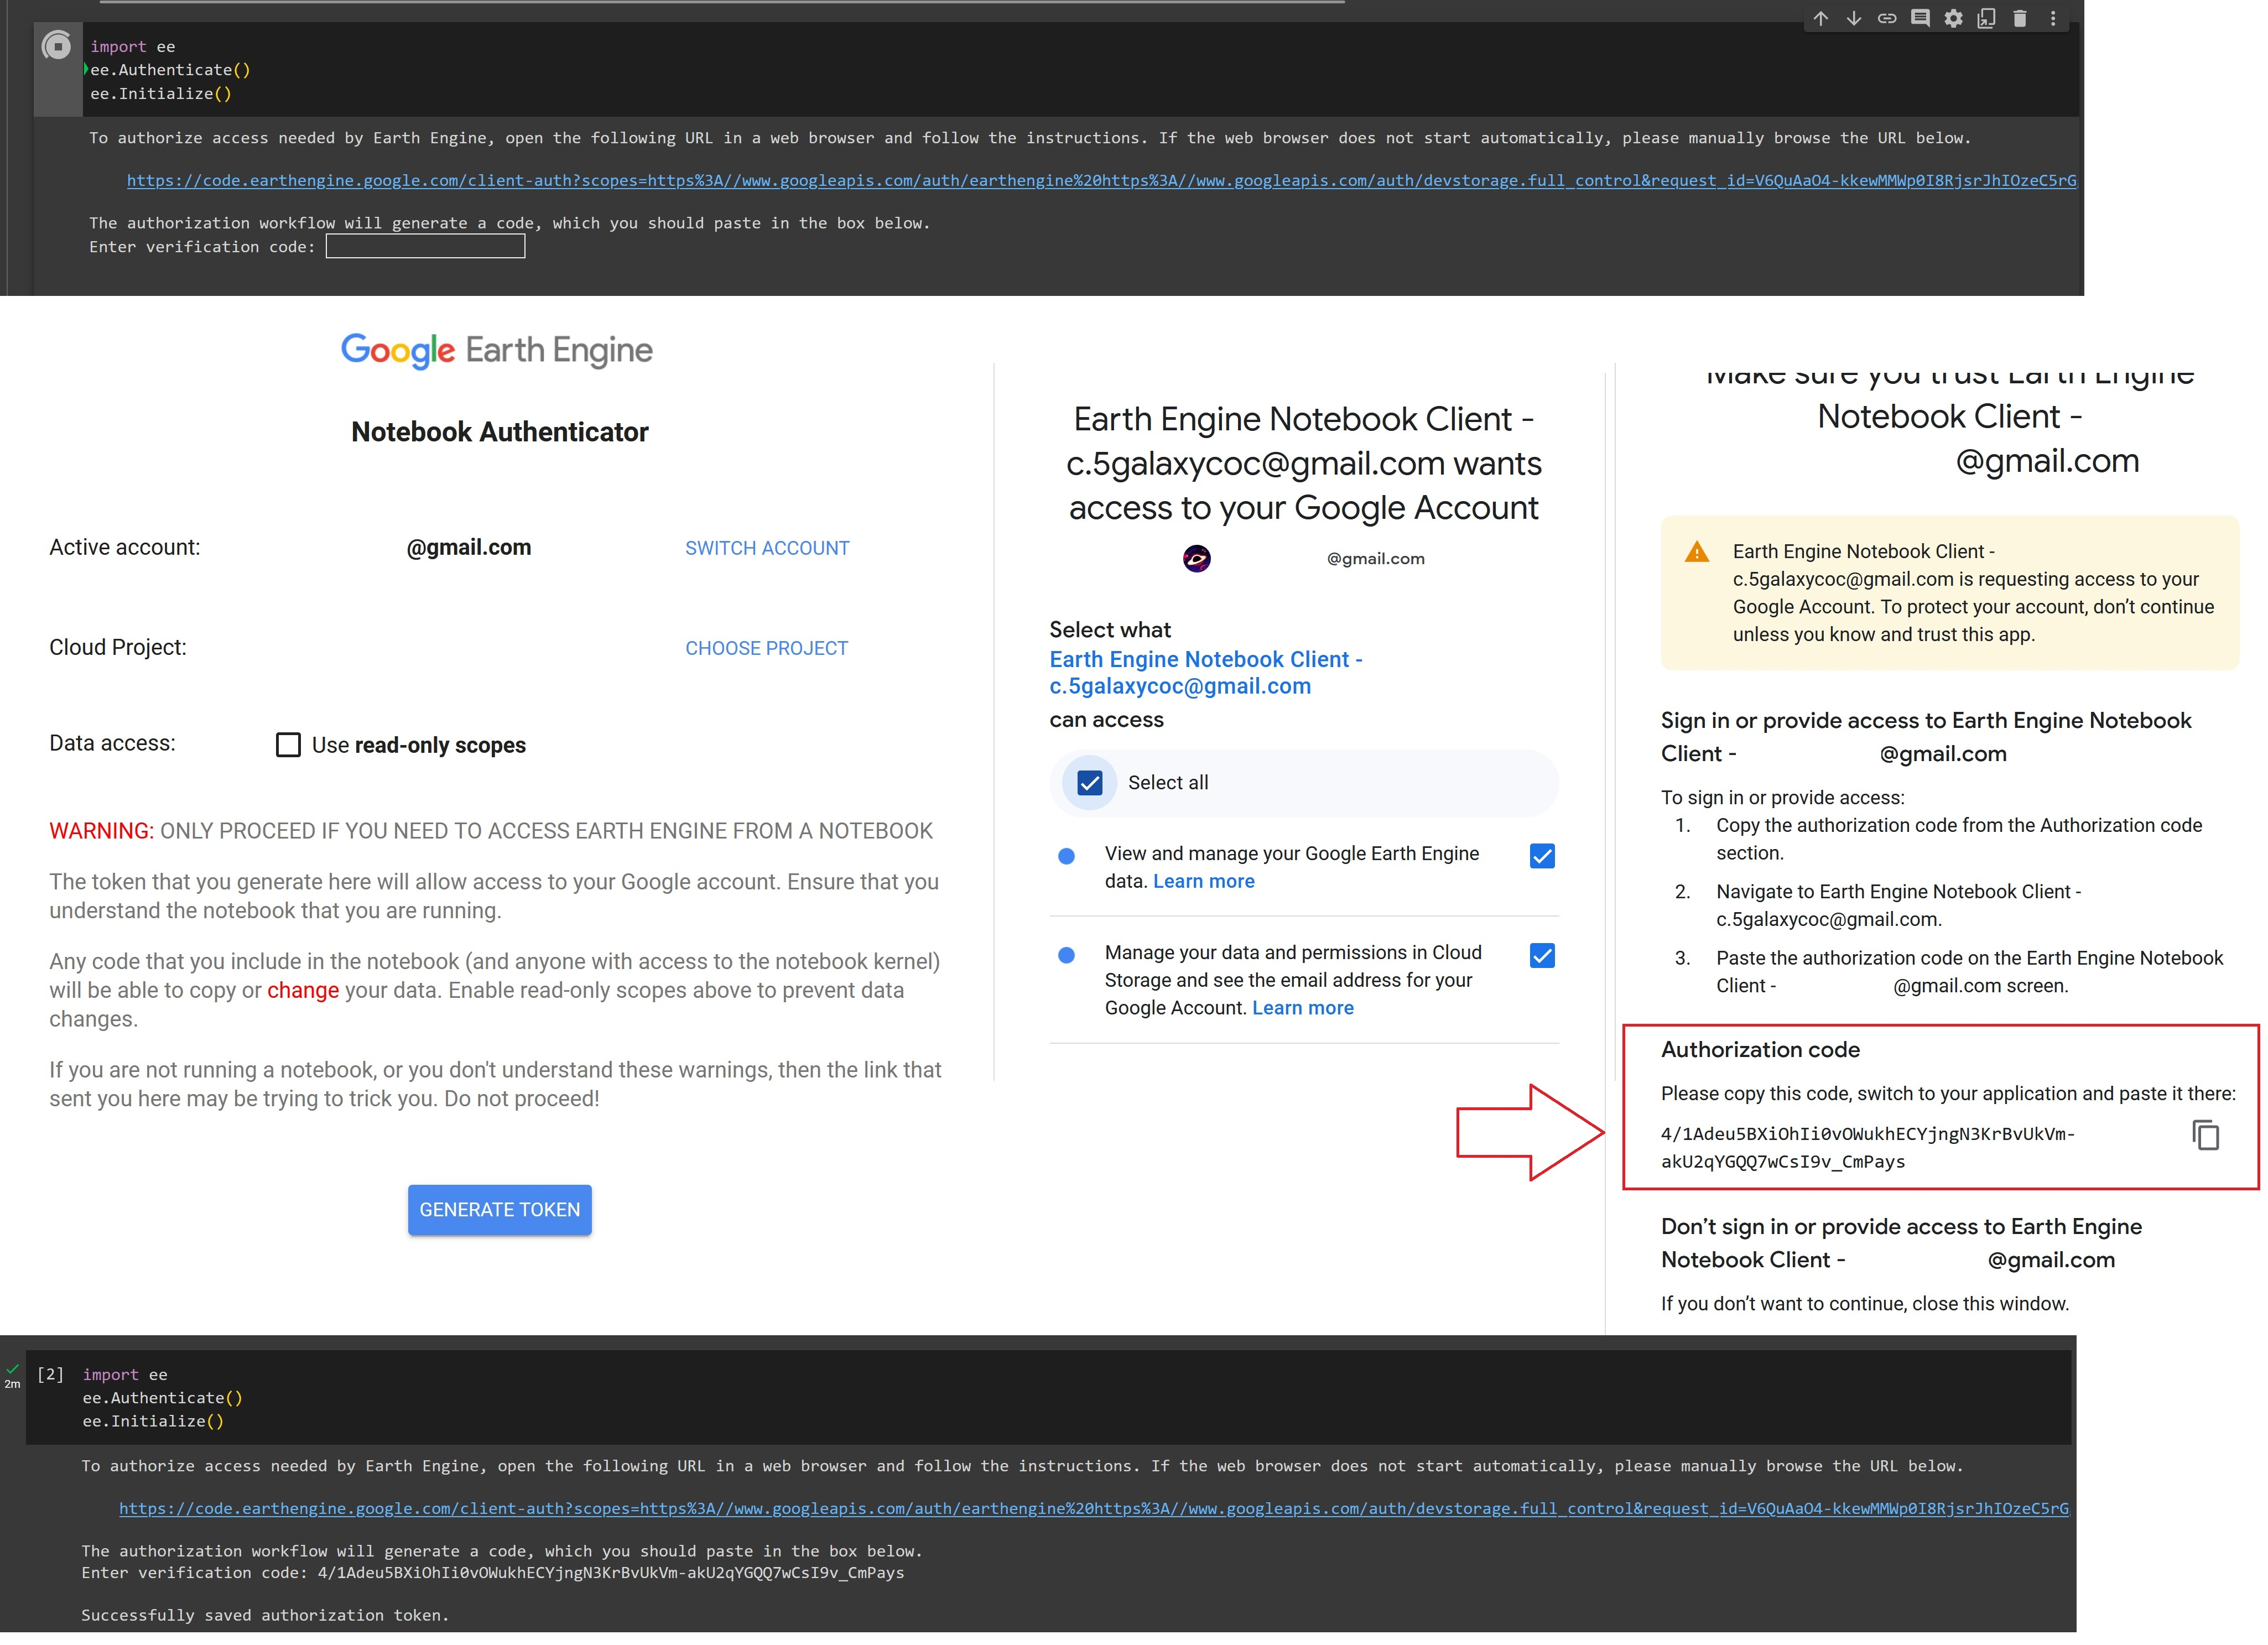

In [ ]:
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.interpolate as spi
import numpy as np
import plotly.graph_objects as go

In [ ]:
elv = ee.Image('USGS/SRTMGL1_003')  # Define Earth Engine image
resolusi = 30  # Set the resolution

In [ ]:
# Define region of interest
region_a = (-6.797513, 107.566679) #<---------- Adjust the coordinate of region that want to visualize the terrain
region_b = (-6.729767, 107.650550) #<---------- Adjust the coordinate of region that want to visualize the terrain

# Generate random coordinates
num_examples = 300   #<------------- Adjust the number of generated point, higher number of point resulting more smooth terrain visualization but took more time to process the data
x_coords = [random.uniform(region_a[1], region_b[1]) for _ in range(num_examples)]
y_coords = [random.uniform(region_a[0], region_b[0]) for _ in range(num_examples)]

# Obtain elevation data
z_values = []
for x, y in zip(x_coords, y_coords):
    elevation = elv.sample(ee.Geometry.Point([x, y]), resolusi).first().get('elevation').getInfo()
    z_values.append(elevation)


Defining region coordinate, use Google maps to receive specific coordinate and paste it in the code above. **Region_a** is the coordinate of most southwest part of region while **Region_b** is the coordinate of most norteast part of region,

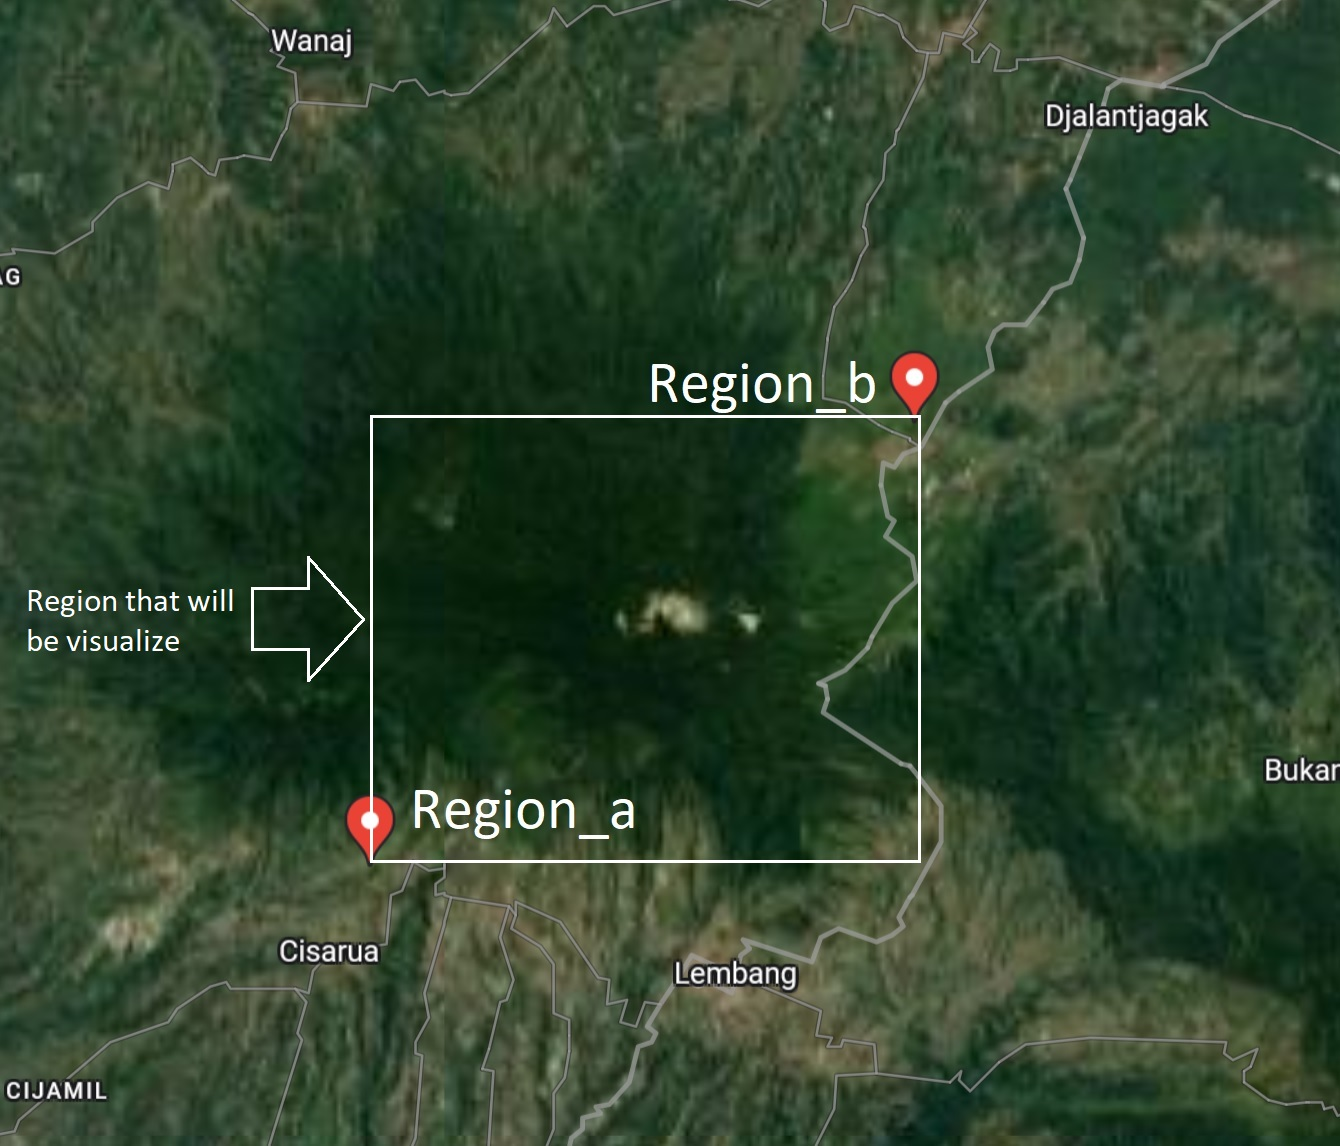

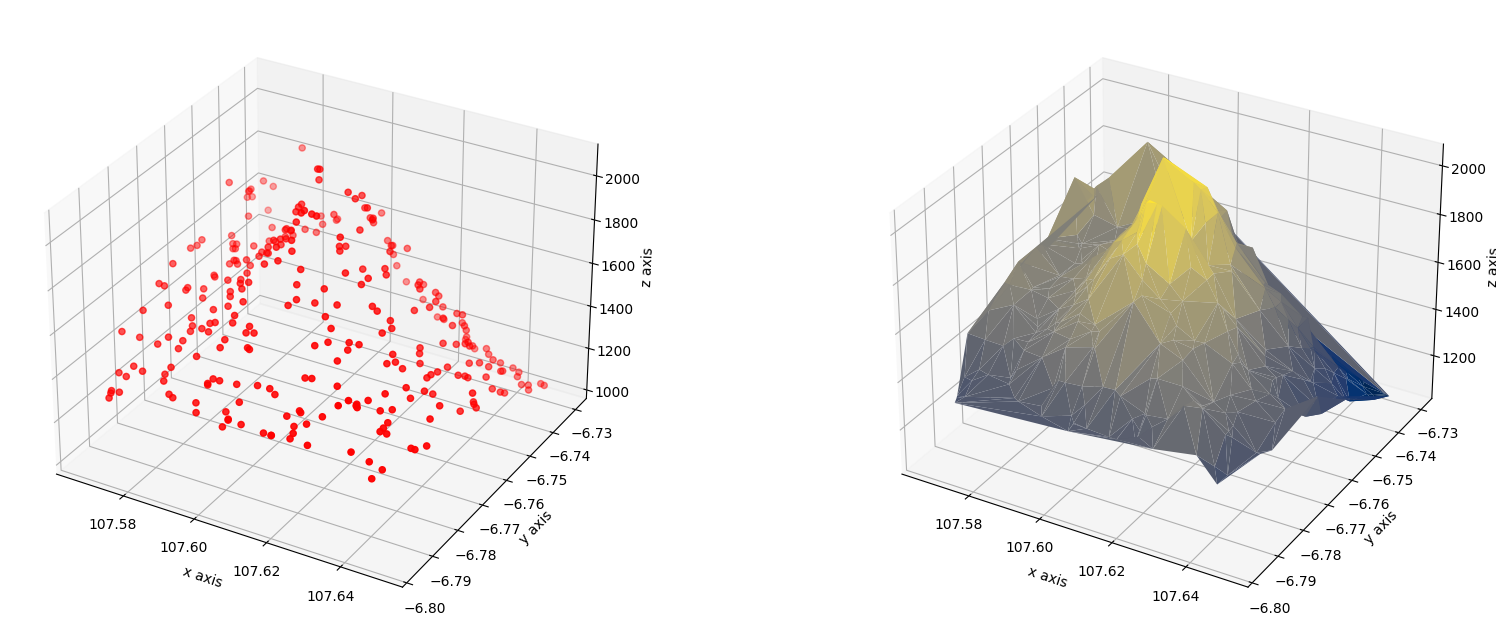

In [ ]:
# Visualize the data
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(121, projection='3d')   #Visualize the scatter,

x = x_coords
y = y_coords
z = z_values

# Scatter plot
ax.scatter(x, y, z, c='r', marker='o')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')

# Surface plot
ax = fig.add_subplot(122, projection='3d')
ax.plot_trisurf(x, y, z, cmap='cividis', edgecolor='none') #visualize the surface

ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')

plt.show()


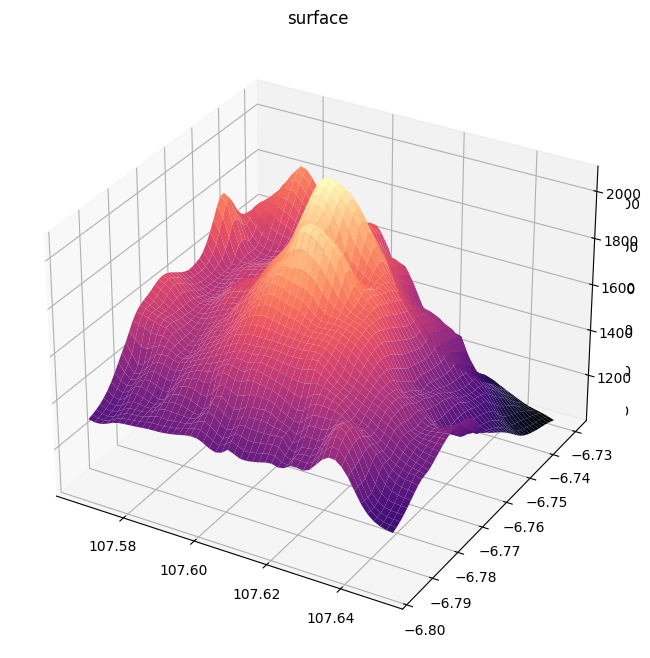

In [ ]:
# 2D grid construction
spline = spi.Rbf(x, y, z, function='thin-plate')
xi = np.linspace(min(x), max(x))
yi = np.linspace(min(y), max(y))
X, Y = np.meshgrid(xi, yi)

# Interpolation
Z = spline(X, Y)

# Visualization
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, Z)
ax.plot_surface(X, Y, Z, alpha=0.2)
ax.scatter3D(x, y, z, c='r')

# Colormap (CMAP)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='magma', edgecolor='none')
ax.set_title('surface')
#ax.view_init(10, -100) # Set elevation angle to 10 and azimuth angle to -100

plt.show()

In [ ]:
# Generate your data (x, y, z)

# 2D grid construction
spline = spi.Rbf(x, y, z, function='thin-plate')
xi = np.linspace(min(x), max(x), 100)
yi = np.linspace(min(y), max(y), 100)
X, Y = np.meshgrid(xi, yi)

# Interpolation
Z = spline(X, Y)

# Create the 3D surface plot with custom colorscale
fig = go.Figure(data=[go.Surface(x=X, y=Y, z=Z, colorscale='Viridis')])

# Set the title and axis labels
fig.update_layout(title='Surface Plot Oridinal', scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'))

# Enable 3D rotation and zoom
fig.update_layout(scene=dict(camera=dict(eye=dict(x=1.75, y=1.75, z=0.75))))

# Adjust the plot size to make it square
fig.update_layout(width=1000, height=900)

# Show the plot
fig.show()

In [ ]:
# Generate your data (x, y, z)

# Define the desired maximum z-value for visualization
z_visual_max = 4000  # <------------ Adjustable # Maximum value for visualization

# 2D grid construction
spline = spi.Rbf(x, y, z, function='thin-plate')
xi = np.linspace(min(x), max(x), 100)
yi = np.linspace(min(y), max(y), 100)
X, Y = np.meshgrid(xi, yi)

# Interpolation
Z = spline(X, Y)

# Create the 3D surface plot with custom colorscale and z-axis range
fig = go.Figure(data=[go.Surface(x=X, y=Y, z=Z, colorscale='Viridis')])

# Set the title and axis labels
fig.update_layout(title='Surface Plot, Adjustable Z scale', scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'))

# Set the range of the z-axis for visualization
fig.update_layout(scene=dict(zaxis=dict(range=[0, z_visual_max])))

# Enable 3D rotation and zoom
fig.update_layout(scene=dict(camera=dict(eye=dict(x=1.75, y=1.75, z=0.75))))

# Adjust the plot size to make it square
fig.update_layout(width=1000, height=900)

# Show the plot
fig.show()


In [ ]:
# Generate your data (x, y, z)

# Define the desired maximum z-value for visualization
z_visual_max = 3000  # Maximum value for visualization

# 2D grid construction
spline = spi.Rbf(x, y, z, function='thin-plate')
xi = np.linspace(min(x), max(x), 100)
yi = np.linspace(min(y), max(y), 100)
X, Y = np.meshgrid(xi, yi)

# Interpolation
Z = spline(X, Y)

# Create the 3D surface plot with custom colorscale and z-axis range
fig = go.Figure(data=[go.Surface(x=X, y=Y, z=Z, colorscale='Viridis', contours=dict(z=dict(show=True, start=0, end=z_visual_max, size=25)))])  # Add contour lines

# Set the title and axis labels
fig.update_layout(title='Surface Plot, Adjustable Z scale with Contour Lines', scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'))

# Set the range of the z-axis for visualization
fig.update_layout(scene=dict(zaxis=dict(range=[0, z_visual_max])))

# Enable 3D rotation and zoom
fig.update_layout(scene=dict(camera=dict(eye=dict(x=1.75, y=1.75, z=0.75))))

# Adjust the plot size to make it square
fig.update_layout(width=1000, height=900)

# Show the plot
fig.show()


Comparing real terrain of Tangkuban perahu and the data modelling from Bandung Perfective

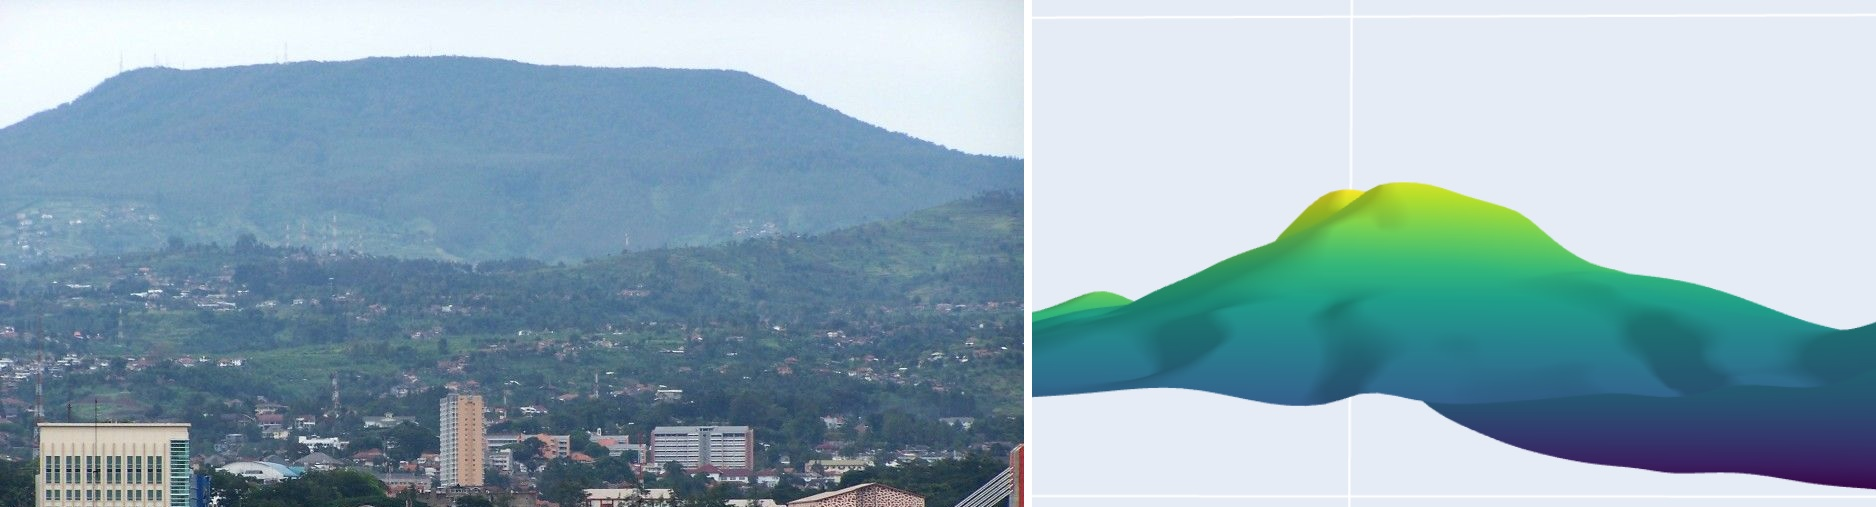